In [72]:
! pip install pandas


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
! pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
! pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

In [76]:
#Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980
df = pd.read_csv(r'Datasets/Annual_Surface_Temperature_Change.csv')

print(df.head(1))

# df.keys()


   ObjectId                       Country ISO2 ISO3  \
0         1  Afghanistan, Islamic Rep. of   AF  AFG   

                                           Indicator            Unit  \
0  Temperature change with respect to a baseline ...  Degree Celsius   

                                              Source CTS_Code  \
0  Food and Agriculture Organization of the Unite...     ECCS   

                     CTS_Name  \
0  Surface Temperature Change   

                                 CTS_Full_Descriptor  ...   2013   2014  \
0  Environment, Climate Change, Climate Indicator...  ...  1.281  0.456   

    2015   2016  2017   2018  2019   2020   2021   2022  
0  1.093  1.555  1.54  1.544  0.91  0.498  1.327  2.012  

[1 rows x 72 columns]


In [77]:
df.keys()

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [78]:
df.drop(['ISO2', 'ISO3', 'Indicator','Unit', 'Source', 'CTS_Code', 'CTS_Name',
       'CTS_Full_Descriptor'], axis=1,inplace=True)

In [79]:
df.keys()

Index(['ObjectId', 'Country', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022'],
      dtype='object')

In [80]:
df.loc[90]

ObjectId       91
Country     India
1961       -0.208
1962       -0.479
1963        -0.03
            ...  
2018        0.874
2019        0.802
2020         0.52
2021        0.733
2022         0.79
Name: 90, Length: 64, dtype: object

Text(0, 0.5, 'temperature change')

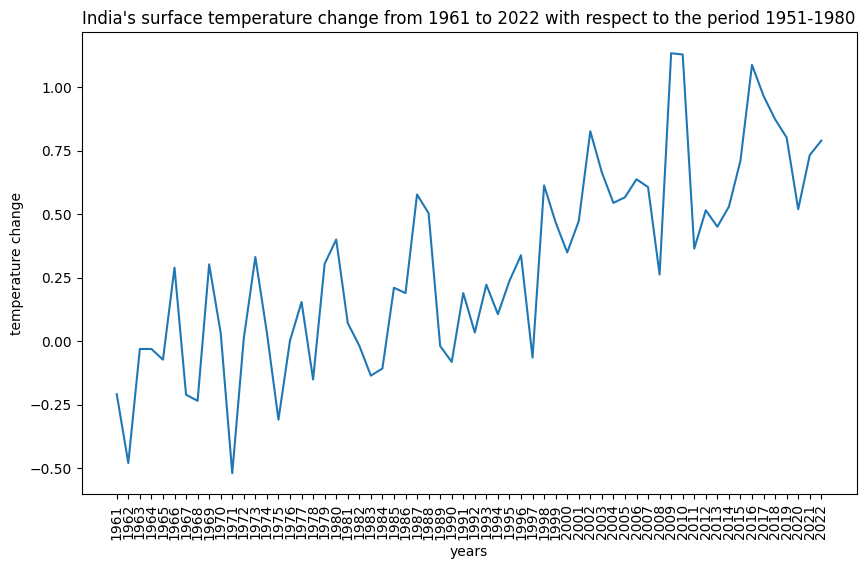

In [81]:
row_values = df.iloc[90].values
row_values=row_values[2:]
column_names = df.columns[2:]
# column_names
plt.figure(figsize=(10,6))
plt.plot(column_names, row_values)
plt.title("India's surface temperature change from 1961 to 2022 with respect to the period 1951-1980")
plt.xlabel('years')
plt.xticks(rotation=90)
plt.ylabel('temperature change')

In [82]:
# filtered_df = df[df['Country'] == 'France']

In [83]:
# filtered_df["ObjectId"]

In [84]:
# filtered_df
# row_values = filtered_df.values
# row_values=row_values
# column_names = filtered_df.columns
# # column_names
# plt.figure(figsize=(10,6))
# plt.plot(column_names, row_values)
# plt.title("India's surface temperature change from 1961 to 2022 with respect to the period 1951-1980")
# plt.xlabel('years')
# plt.xticks(rotation=90)
# plt.ylabel('temperature change')

In [85]:
df.drop(['ObjectId', 'Country'], axis=1,inplace=True)

In [86]:
a=df.mean()
print(a)


1961    0.163053
1962   -0.013476
1963   -0.006043
1964   -0.070059
1965   -0.247027
          ...   
2018    1.302113
2019    1.443061
2020    1.552038
2021    1.343531
2022    1.382113
Length: 62, dtype: float64


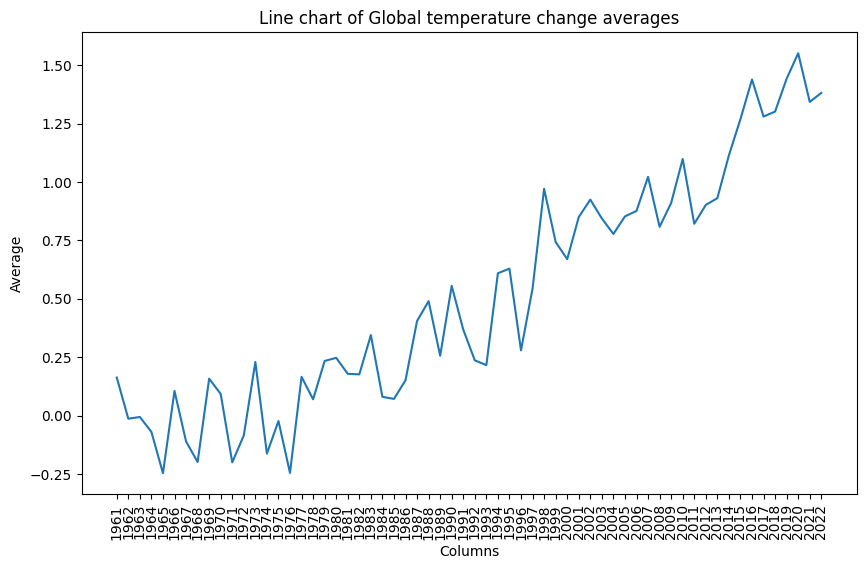

In [87]:
column_names = a.index
column_averages = a.values

plt.figure(figsize=(10,6))
plt.plot(column_names, column_averages)
plt.xlabel('Columns')
plt.ylabel('Average')
plt.title('Line chart of Global temperature change averages')
plt.xticks(rotation=90)  # This will rotate the x-axis labels for better visibility if they are long
plt.show()

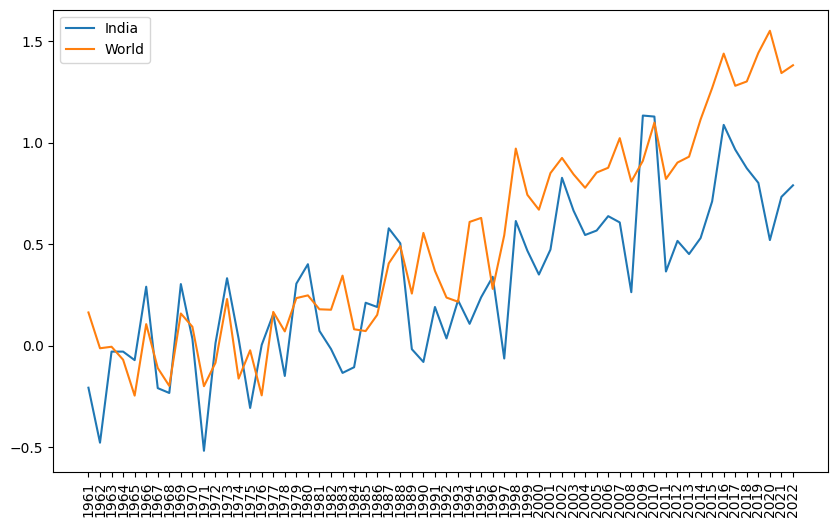

In [88]:
plt.figure(figsize=(10,6))
plt.plot(column_names, row_values,label="India")
plt.plot(column_names,column_averages,label="World")
plt.xticks(rotation=90)
plt.legend()

Training Linear Regression for prediction(Global)

In [89]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [90]:
column_averages=np.array(column_averages)
column_averages=column_averages.reshape(-1,1)
# column_averages

In [91]:
column_names=np.array(column_names)
column_names=column_names.reshape(-1,1)
# column_names

In [92]:
model = LinearRegression()
model.fit(column_names, column_averages)


LinearRegression()

In [93]:
year_to_predict = 2223
predicted_value = model.predict(np.array([[year_to_predict]]))

print(f"The predicted value for the year {year_to_predict} is {predicted_value[0][0]}")

The predicted value for the year 2223 is 6.571698459391165


Training linear regression for prediction (India)

In [94]:
row_values=np.array(row_values)
row_values=row_values.reshape(-1,1)
# row_values

In [95]:
model2 = LinearRegression()
model2.fit(column_names, row_values)

LinearRegression()

In [96]:
year_to_predict = 2223
predicted_value = model2.predict(np.array([[year_to_predict]]))

print(f"The predicted value for the year {year_to_predict} is {predicted_value[0][0]}")

The predicted value for the year 2223 is 4.259109339981364


Comparing predictions(Global vs India)

In [97]:
array = np.arange(2024, 2125)
array = array.reshape(-1, 1)
gpredict=model.predict(array)
ipredict=model2.predict(array)

In [98]:
ipredict

array([[0.85469145],
       [0.87179907],
       [0.8889067 ],
       [0.90601433],
       [0.92312196],
       [0.94022958],
       [0.95733721],
       [0.97444484],
       [0.99155247],
       [1.00866009],
       [1.02576772],
       [1.04287535],
       [1.05998298],
       [1.0770906 ],
       [1.09419823],
       [1.11130586],
       [1.12841349],
       [1.14552112],
       [1.16262874],
       [1.17973637],
       [1.196844  ],
       [1.21395163],
       [1.23105925],
       [1.24816688],
       [1.26527451],
       [1.28238214],
       [1.29948976],
       [1.31659739],
       [1.33370502],
       [1.35081265],
       [1.36792027],
       [1.3850279 ],
       [1.40213553],
       [1.41924316],
       [1.43635078],
       [1.45345841],
       [1.47056604],
       [1.48767367],
       [1.50478129],
       [1.52188892],
       [1.53899655],
       [1.55610418],
       [1.57321181],
       [1.59031943],
       [1.60742706],
       [1.62453469],
       [1.64164232],
       [1.658

In [99]:
gpredict

array([[1.36385322],
       [1.3900233 ],
       [1.41619337],
       [1.44236345],
       [1.46853353],
       [1.4947036 ],
       [1.52087368],
       [1.54704376],
       [1.57321383],
       [1.59938391],
       [1.62555399],
       [1.65172406],
       [1.67789414],
       [1.70406422],
       [1.73023429],
       [1.75640437],
       [1.78257445],
       [1.80874452],
       [1.8349146 ],
       [1.86108468],
       [1.88725475],
       [1.91342483],
       [1.9395949 ],
       [1.96576498],
       [1.99193506],
       [2.01810513],
       [2.04427521],
       [2.07044529],
       [2.09661536],
       [2.12278544],
       [2.14895552],
       [2.17512559],
       [2.20129567],
       [2.22746575],
       [2.25363582],
       [2.2798059 ],
       [2.30597598],
       [2.33214605],
       [2.35831613],
       [2.38448621],
       [2.41065628],
       [2.43682636],
       [2.46299644],
       [2.48916651],
       [2.51533659],
       [2.54150667],
       [2.56767674],
       [2.593

In [100]:
gpredict=gpredict.reshape(1,-1)
ipredict=ipredict.reshape(1,-1)
# gpredict

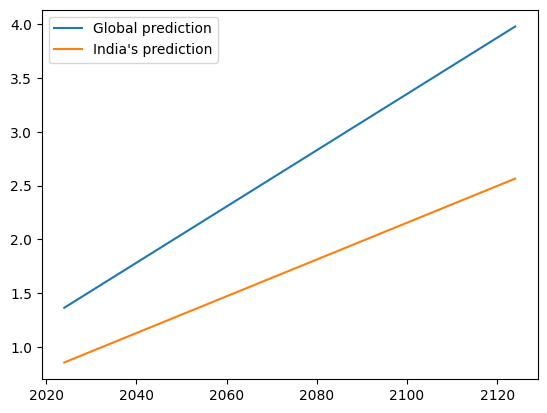

In [101]:
plt.plot(array,gpredict[0],label="Global prediction")
plt.plot(array,ipredict[0],label="India's prediction")
plt.legend()
# plt.show()

Making a 3D Scatter Plot OF BRICS COUNTRIES

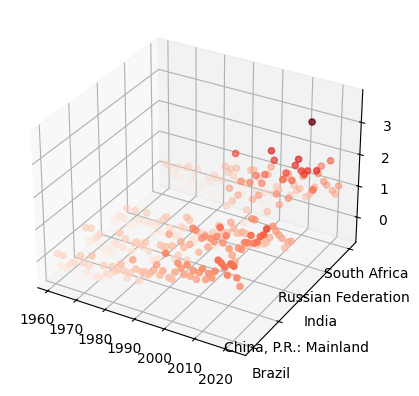

In [102]:
df = pd.read_csv(r'Datasets/Annual_Surface_Temperature_Change.csv')

df.drop(['ObjectId','ISO2', 'ISO3', 'Indicator','Unit', 'Source', 'CTS_Code', 'CTS_Name',
       'CTS_Full_Descriptor'], axis=1,inplace=True)

brics_countries = ['Brazil', 'Russian Federation', 'India', 'China, P.R.: Mainland', 'South Africa']
df_bricks = df[df['Country'].isin(brics_countries)]

df_melted = df_bricks.melt(id_vars='Country', var_name='Year', value_name='Temperature')

years = df_melted['Year'].astype(int)  
countries = df_melted['Country']
temperatures = df_melted['Temperature']

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = temperatures
xdata = years
ydata = pd.Categorical(countries).codes  # Convert countries to numerical categories
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds');

# Setting y-axis tick labels to country names
ax.set_yticks(range(len(countries.unique())))
ax.set_yticklabels(countries.unique())

plt.show()
